In [13]:
#We will be working on Boston Data Set and predict the sale value of the house based on features
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
xs = np.array([1,2,3,4,5,6])
ys = np.array([5,4,6,5,6,7])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
clf = LinearRegression()
xs = xs.reshape((6,1)) 
#Reshaping is done for fitting. For a row of features (here the row contains only one element), one element of Ys is picked
clf.fit(xs, ys)
print("xs" , xs)
print("ys" , ys)

xs [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
ys [5 4 6 5 6 7]


In [17]:
clf.predict([[0],[7]]) #Giving x_test data to the classifier to predict y values
#Line of fit for Linear Regression in one variable - mx+b
#The value of m and b derived by the classifier can be seen the following manner
print( " m -" ,  clf.coef_)
print(" b - " , clf.intercept_)

 m - [ 0.42857143]
 b -  4.0


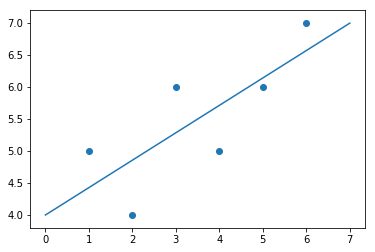

In [18]:
x2 = [0,7]
y2 = [4, 7]
plt.plot(x2,y2) #Plotting plots and joins the line
plt.scatter(xs, ys) #Scattering only plots the points and doesnt join them
plt.show()

### Working on House Pricing Dataset - Boston Dataset

In [19]:
boston=datasets.load_boston() #loading the in-built boston dataset of sklearn
type(boston.data) #numpy.ndarray
boston.data.shape #boston.data contains the x values for each data

(506, 13)

In [20]:
df=pd.DataFrame(boston.data) #converting boston.data in a pandas dataframe so that we can apply cleaning
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.columns

RangeIndex(start=0, stop=13, step=1)

In [22]:
print(boston.feature_names) #feature_names present data set contains name of the columns of x
boston.DESCR # DESCR present in data set tells about different features/columns in detail,which are dummy variables
#(variables added by data set maker)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [23]:
#no values for price of houses present in boston.data
# we have to find out price(our Y) in boston data set

In [24]:
boston.target[0:5] # values of prices (Y in other words) are contained in target

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [25]:
df.columns=boston.feature_names #changing column_names to feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
df.describe() #all 506 so no null present ,discuss Chas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
clf=LinearRegression() #object of Linear Regression Class ...WE will be giving our training data 
#to this object and later upon giving data(Testing data) it will be able to predict and is called a classifier

In [29]:
from sklearn import cross_validation
X_Train,X_Test,Y_Train,Y_Test=cross_validation.train_test_split(df,boston.target,test_size=0.02)
#will split the data in 98% for training and 2% for testing 

In [30]:
#clf.fit(df,boston.target) #here fitting the entire data set to train(Not a good practise)
#fitting our training data in the object so that it can calculate and
#give predicted values later on
clf.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#clf.predict(boston.data[0:5]) 
# to predict The answer along some data given (Here giving a part of data entries),
#here testing the machine over a part of the data given to train 
clf.predict(X_Test) # Here giving our testing data to predict

array([ 19.33438566,  27.30724582,  27.02955866,  30.87210535,
        19.9387513 ,  33.59215075,  17.20323797,  30.95083107,
        19.43357613,  23.07800939,  15.2678249 ])

In [32]:
#boston.target[0:5] #comparing the actual values with tha above predicted values
Y_Test

array([ 14.6,  22.6,  22.1,  23.6,  17.1,  32. ,  19.4,  28.4,  12.5,
        23.8,  18.9])

In [33]:
m = clf.coef_
b = clf.intercept_
print("slopes" , m)
print("intercept" , b)

slopes [ -1.08785278e-01   4.56021459e-02   1.12151458e-02   2.58901221e+00
  -1.80192847e+01   3.81238613e+00   1.03758209e-03  -1.52207009e+00
   3.11130754e-01  -1.23059806e-02  -9.58344249e-01   9.75146044e-03
  -5.29002203e-01]
intercept 36.8546217799


### Formula for calculating Score
### 1-(summation((Yactual-Ypredicted)^2)/summation((Yactual-Ymean)^2)) 
### Value of score remains between 0 and 1

In [34]:
score=clf.score(X_Test,Y_Test) #comparing the data only by looking not a good way so 
#calculating score to get an idea of how much difference is there between predicted value and actual testing data value
score


0.37368890117524478

In [35]:
# loaded data set from kaggle and doing the above process for daibestes 
diabetes=pd.read_csv("pima-indians-diabetes.csv")
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [36]:
diabetes.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
type(diabetes)

pandas.core.frame.DataFrame

In [38]:
#diabetes.DESCR #  no features names and this command not working either plus this command is for data set and not for Pandas DataFrame

In [39]:
Y=diabetes["1"]
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: 1, dtype: int64

In [40]:
del diabetes["1"]
diabetes.head()

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [41]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()


In [42]:
from sklearn import cross_validation
X_Train,X_Test,Y_Train,Y_Test=cross_validation.train_test_split(diabetes,Y,test_size=0.2)

In [43]:
clf.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
clf.predict(X_Test)

array([ 0.16433429,  0.66720843,  0.75493453,  0.35174057,  0.11915996,
        0.23912712,  0.10703249,  0.23334112,  0.30040533,  0.42534075,
        0.35440814,  0.74806409,  0.08483236,  0.22824069,  0.14083443,
        0.144337  ,  0.35827045,  0.22301843,  0.05724492,  0.17678428,
        0.47142291,  1.03468775,  0.55663265,  0.38920887,  0.09549823,
        0.51544591,  0.60446871,  0.24115817,  0.40182344,  0.13495708,
        0.16220847,  0.24770652,  0.19816863,  0.38974035,  0.28736866,
        0.32871742,  0.21219057,  0.25280465, -0.04024907,  0.4811704 ,
        0.08022058,  0.84058356,  0.97984596,  0.31380746,  0.21551228,
        0.64256419,  0.33293862,  0.12867744,  0.36091795,  0.08049725,
        0.77702436,  0.35483975,  0.22567566,  0.30781603,  0.41930555,
        0.49374182,  0.67592468,  0.42830258,  0.16612271,  0.16053448,
        0.46638737,  0.25421489,  0.47083008,  0.40499301, -0.02501307,
        0.48787298,  0.33976   ,  0.01737276,  0.89989329,  0.62

In [45]:
Y_Test

429    0
715    1
483    1
325    1
207    0
217    1
490    0
503    0
506    0
637    1
20     0
605    1
223    0
473    0
382    0
653    0
342    0
116    0
145    0
175    0
387    1
158    1
752    1
122    0
276    0
695    1
6      0
250    0
345    0
384    0
      ..
618    1
646    1
725    0
161    0
105    0
745    1
359    1
240    0
762    0
242    1
453    0
284    0
25     1
411    0
299    1
459    0
305    1
456    0
491    0
237    1
550    0
464    0
638    0
110    1
227    0
120    0
185    1
591    1
434    1
691    0
Name: 1, Length: 154, dtype: int64

In [46]:
score=clf.score(X_Test,Y_Test)
score

0.3825517861045209

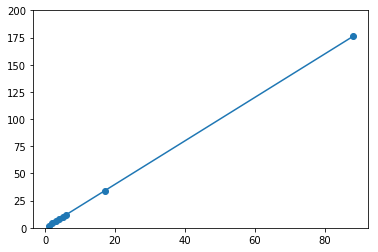

In [47]:
# Realising how internally the work must have beem performed
# Assuming that we have only one feature as x and the output is y
x=np.array([1,2,3,4,5,6,17,88])
y=np.array([2,4,6,8,10,12,34,176])
#Training the machine from the given data , means extracting the value of m and b for further calculating
# here we have linear regression so a line is considered and hence value of m and b there
#For this we find out error E= (YActual-(YPredicted))**2 ..Here YPredicted=mx+b (for value of m and b)
# the value of m and b is found out by differentiatiing wrt to m and b and evaluating to zero to find m and b
def fit(x,y):
    xyMean=(x*y).mean()
    yMeanxMEan= (x.mean())*(y.mean())
    x2Mean= (x*x).mean()
    xMean2= (x.mean())**2  
    yMean= y.mean()
    xMean=x.mean()
    m= (xyMean-yMeanxMEan)/(x2Mean-xMean2)
    b=yMean-m*(xMean)
    return m,b
#After training the machine(getting value for m and b) we are predicting from the machine the value of Y
def predict (x,m,b):
    preY= x*m+b
    return preY
m,b=fit(x,y)
plt.ylim(0,200) #To limit Y (To see graph properly)
preY=predict(x,m,b)
plt.scatter(x,y)
plt.plot(x,preY)
plt.show()

    

### Below is yet to debug

0.0
nan nan nan
[  2   4   6   8  10  12  34 176]
[ nan  nan  nan  nan  nan  nan  nan  nan]


/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/melon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


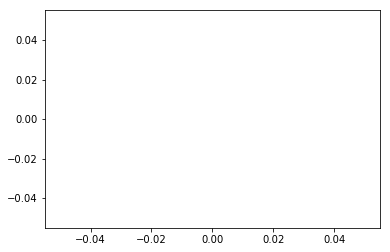

In [61]:
#Doing the same if there had been two features x1,x2 and the output is y
#To check again D is coming equal to zero
x1=np.array([1,2,3,4,5,6,17,88])
x2=np.array([1.5,2.5,3.5,4.5,5.5,6.5,17.5,88.5])
X=np.vstack((x1,x2)).T #For combining two 1d arrays in to one 2d array
y=np.array([2,4,6,8,10,12,34,176])
def fit(x1,x2,y):
    x1mean= x1.mean()
    x2mean=x2.mean()
    ymean=y.mean()
    x1x2mean= (x1*x2).mean()
    x12mean= (x1*x1).mean()
    x22mean=(x2*x2).mean()
    ymean=y.mean()
    x1ymean=(x1*y).mean()
    x2ymean=(x2*y).mean()
    
    D= x12mean*(x22mean-x2mean*x2mean)-x1x2mean*(x1x2mean-x1mean*x2mean)+x1mean*(x1x2mean*x2mean-x1mean*x22mean)
    print(D)
    Dx=x1ymean*(x22mean-x2mean*x2mean)-x1x2mean*(x2ymean-x2mean*ymean)+x1mean*(x2ymean*x2mean-x22mean*ymean)
    Dy=x12mean*(x2ymean-x2mean*ymean)-x1ymean*(x1x2mean-x1mean*x2mean)+x1mean*(x1x2mean*ymean-x1mean*x2ymean)
    Dz=x12mean*(x22mean*ymean-x2mean*x2ymean)-x1x2mean*(x1x2mean*ymean-x2ymean*x1mean)+x1ymean*(x1x2mean*x2mean-x1mean*x22mean)
    m1=Dx/D
    m2=Dy/D
    b=Dz/D
    print (m1,m2,b)
    return m1,m2,b
def predict(x1,x2,m1,m2,b):
    return m1*x1+m2*x2+b
m1,m2,b=fit(x1,x2,y)
ypredict=predict(x1,x2,m1,m2,b)
print (y)
print (ypredict)
plt.plot(X,ypredict)
plt.show()


### Applying Linear Regression on Randomly generated Data

In [65]:
x = np.arange(150) #Return evenly spaced values within a given interval.
print(x.shape)
y = np.arange(150, 600 , 3) #Parameters are - startnumber , stop number and jump where stop number is mandatory to give
#print(y)
print("Reshaping x")
x = x.reshape((150, 1))
#print(x)
xtt,xt,ytt,yt = cross_validation.train_test_split(x,y,test_size=0.2)
clf=LinearRegression()
clf.fit(xtt , ytt)

(150,)
Reshaping x


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
score=clf.score(xt,yt) # yet to check 
score

1.0